2-2 데이터 전처리

In [30]:
# 데이터 입력
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 
                11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [31]:
# 넘파이 활용
import numpy as np

In [32]:
# column_stack(): 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결
fish_data = np.column_stack((fish_length, fish_weight))
# 확인
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [33]:
# target 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 도미가1, 빙어가 0
# 확인
print(fish_target) 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [34]:
# train_test_split(): 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어준다.
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

# 잘 분할되었는지 확인
print(train_input.shape, test_input.shape)
print(test_target)

(36, 2) (13, 2)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [41]:
# 그러나 도미가 10개, 빙어가 3개이므로 샘플링 편향이 나타났다.
# 이는 train_test_split의 stratify 매개변수에 타깃 데이터를 전달해 해결한다.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

# 확인
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [42]:
# KNN 모델 학습
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [43]:
# 새로운 데이터 확인
print(kn.predict([[25, 150]]))# 새로운 데이터(도미1)
# 그러나 0(빙어)으로 예측해버림

[0.]


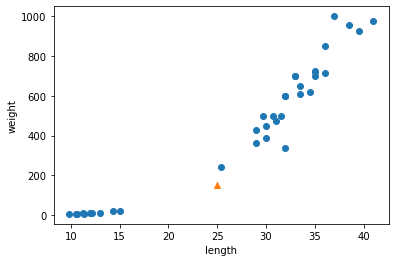

In [44]:
# 예측을 하지 못함. 산점도로 확인해보자
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) # target값을 기준으로 나눔
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

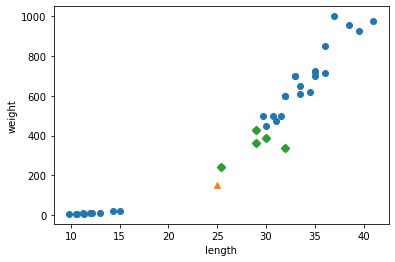

In [ ]:
# kneighbors() 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환해준다.
distances, indexes = kn.kneighbors([[25, 250]])

# 산점도로 확인
plt.scatter(train_input[:, 0], train_input[:,1]) # target값을 기준으로 나눔
plt.scatter(25, 150, marker='^') # 새로운 데이터(도미1)
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 여기선 산점도가 이상하게 나오지만 결과 예측은 0으로 나와 일단 진행하였다.

In [46]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 32.  340. ]
  [ 29.  363. ]
  [ 30.  390. ]
  [ 29.  430. ]]]


In [47]:
# 산점도는 정상이지만, 0으로 예측
print(kn.predict([[25, 150]]))# 새로운 데이터(도미1)

[0.]


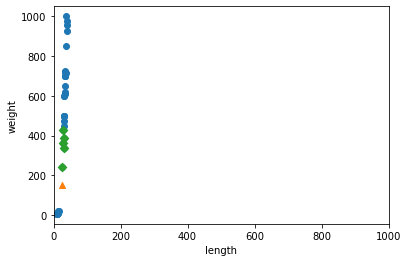

In [48]:
# 기준점 맞추기
# x축과 y축의 거리가 다르다
plt.scatter(train_input[:, 0], train_input[:,1]) # target값을 기준으로 나눔
plt.scatter(25, 150, marker='^') # 새로운 데이터(도미1)
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [49]:
# 두 특성의 값이 놓인 범위가 매우 다르다 -> 두 특성의 스케일이 다르다
# 이런 알고리즘은 샘플간의 거리에 영향을 많이 받는다 -> 특성값을 일정한 기준으로 맞춰야 한다 -> 데이터 전처리
# 가장 널리 사용하는 전처리 방법 중 하나는 표준점수이다. -> 평균을 빼고 표준편차를 나누어주면 된다.
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [50]:
#  원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환
train_scaled = (train_input - mean) / std # 넘파이의 브로드캐스팅 사용

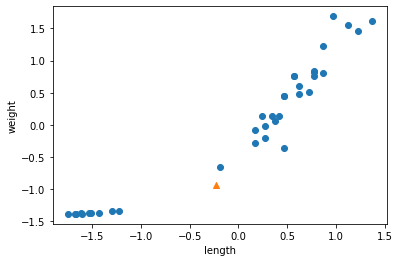

In [51]:
# 전처리 데이터(표준점수)로 산점도 그려보기
# 새로 들어가는 값도 표준점수를 통해서 입력되어야한다.
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:, 0], train_scaled[:,1]) 
plt.scatter(new[0], new[1], marker='^') # 새로운 데이터(도미1)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [53]:
# 이 데이터셋으로 KNN 모델 다시 학습
kn.fit(train_scaled, train_target)

# 테스트 세트도 표준점수로 변환해야된다.
test_scaled = (test_input - mean) / std

# 모델 평가
kn.score(test_scaled, test_target)

1.0

In [54]:
# 새로운 데이터 값 테스트
print(kn.predict([new]))

[1.]
